In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

import numpy as np

import matplotlib.pyplot as plt

2022-02-10 15:02:31.171013: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-10 15:02:31.171061: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [40]:
def showimg(imgs, labels, preds):
    fig = plt.figure(figsize=(20, 4))
    rows, cols = 1, 10
    for i in range(rows*cols):
        fig.add_subplot(rows, cols, i+1)
        plt.title(str(preds[i]))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imgs[i], cmap='viridis' if labels[i]==preds[i] else 'gray')
    plt.show()
    
class VisualizeCB(Callback):
    def __init__(self, inputs, labels, freq=10, n_samples=10):
        super(VisualizeCB, self).__init__()
        
        self.inputs = inputs
        self.labels = labels
        self.images = []
        self.freq = freq
        self.n_samples = n_samples

        #Sample data
        self.indexes = np.random.choice(len(self.inputs), size=self.n_samples)
        self.x_test, self.y_test = self.inputs[self.indexes], self.labels[self.indexes]

    def on_epoch_end(self, epoch, logs=None):
        # print('\n', epoch, self.freq)
        if (epoch+1) % self.freq == 0:

            
            preds = np.argmax(self.model.predict(self.x_test), axis=1)

            print('EPOCH :', epoch+1)
            showimg(self.x_test, self.y_test, preds)
        

In [48]:
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(8, activation='linear'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

EPOCH : 1


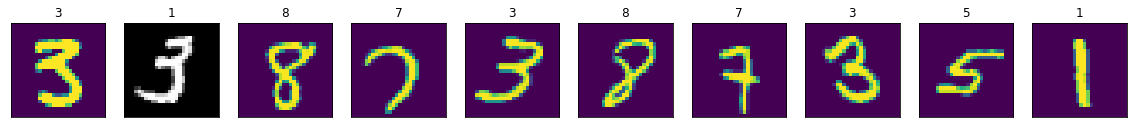

EPOCH : 2


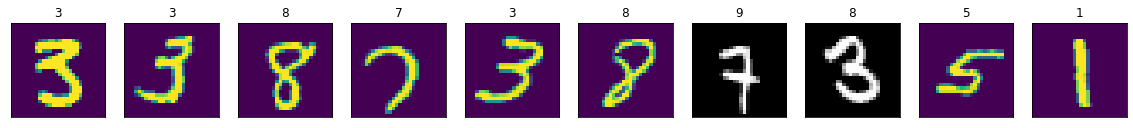

EPOCH : 3


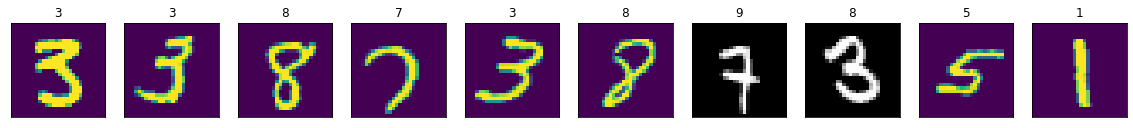

EPOCH : 4


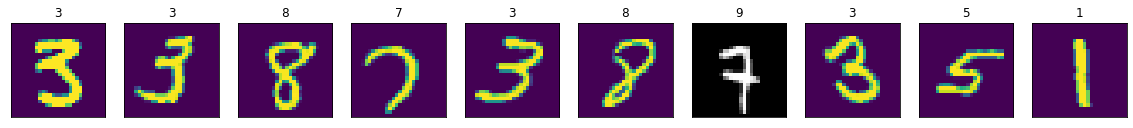

EPOCH : 5


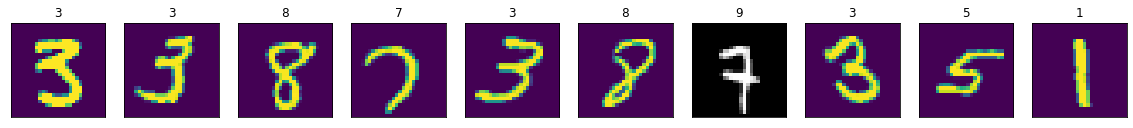

EPOCH : 6


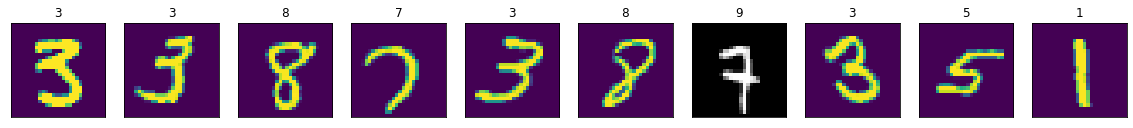

EPOCH : 7


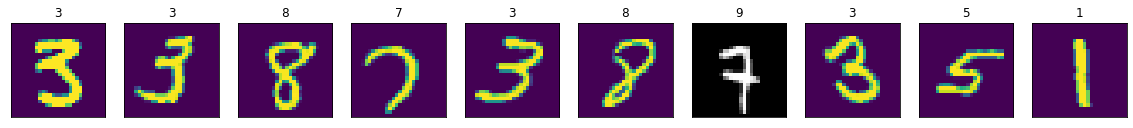

EPOCH : 8


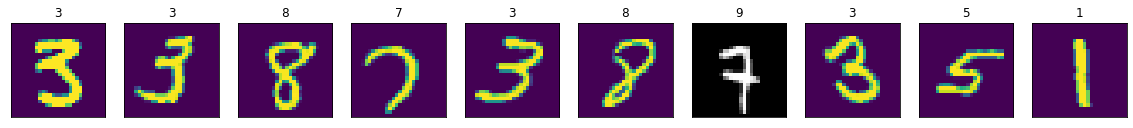

EPOCH : 9


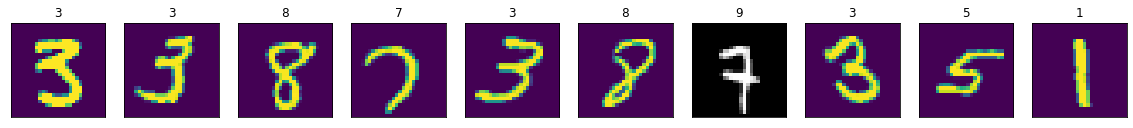

EPOCH : 10


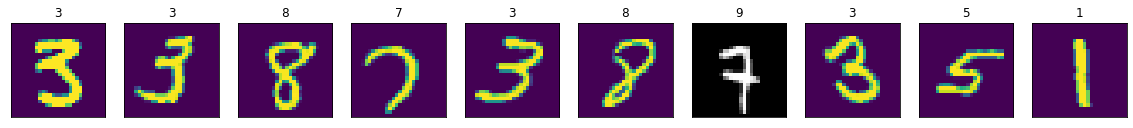

In [49]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

model = get_model()
model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=10,
    verbose=0,
    callbacks=[VisualizeCB(X_test, y_test, freq=1)]
)